# Homework 5: Hypotheses, and hypotheticals.

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

Also, please be sure to always specify units of any quantities that have units,
and label axes of plots (again, with units when appropriate).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
rng = np.random.default_rng()

# 1. Rain

Is it rainier in Eugene or Springfield?
In `data/eug_spr_rain.csv` you'll find data on daily rainfall, in inches,
at NOAA weather stations in Eugene on Queens East Street
and on Dixie Drive in Springfield.
You can read in the data as follows:

In [2]:
import pandas as pd
#rain = pd.read_csv("data/eug_spr_rain.csv").set_index("date")   
#commented because it's in a different folder for me, if needed can uncomment so everything works the same
rain = pd.read_csv("eug_spr_rain.csv").set_index("date")
rain

,eugene,springfield
date,,
2013-03-06,0.77,0.63
2013-03-07,0.18,0.29
2013-03-08,0.01,0.19
2013-03-12,0.00,0.00
2013-03-13,0.00,0.00
...,...,...
2018-02-18,0.11,0.19
2018-05-01,0.02,0.01
2018-05-02,0.00,0.00


**(a)** Look at the data: make histograms of the daily totals in each location,
and a scatter plot of the two locations against each other.

**(b)** Compute the daily difference (Eugene minus Springfield) in rainfall,
    and make a histogram of that.

**(c)** On what proportion of the days did it rain more in Eugene than Springfield?
How about more in Springfield than in Eugene?

**(d)** Compute the $t$ statistic for the Eugene minus Springfield difference,
    and get a $p$-value for the two-sided test
    (i.e., the probability that the $t$ distribution is larger
    in absolute value than the number you calculated).

**(e)** What is your conclusion? Write a few sentences reporting the results,
including the statistical tests and real-world interpretations.
Be sure to include takeaways and context (e.g., what was the average rainfall?).

Text(0.5, 0, 'Inches of Rain in Eugene')

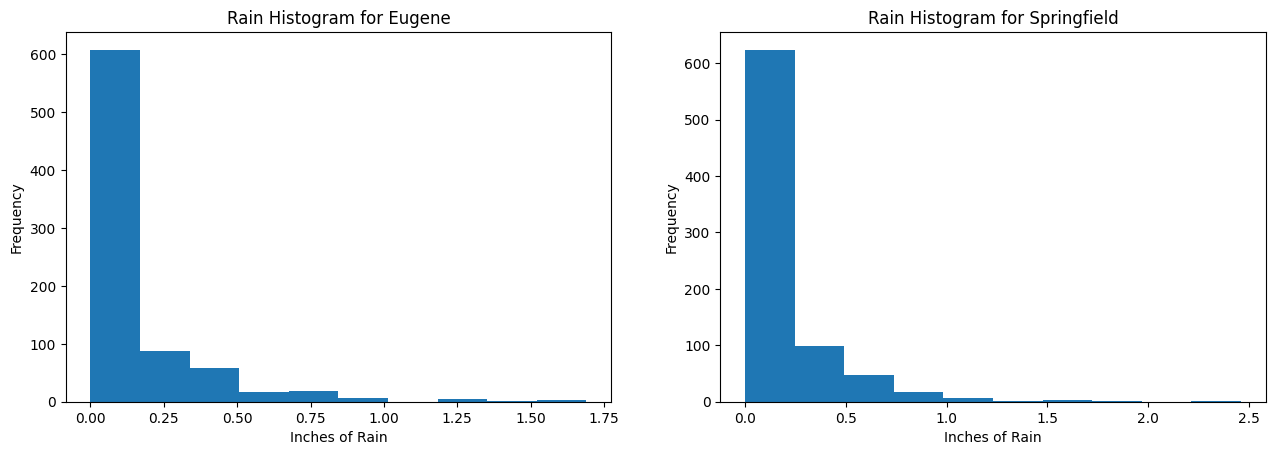

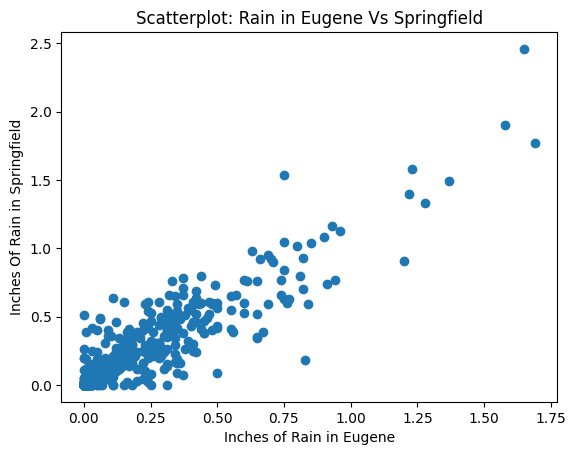

In [3]:
#Code to part A (Making Histograms)
plt.subplot(1,2,1)
plt.hist(rain["eugene"])
plt.ylabel("Frequency")
plt.xlabel("Inches of Rain")
plt.title("Rain Histogram for Eugene")

plt.subplots_adjust(right = 2) #Get the histograms to be spaced wider

plt.subplot(1,2,2)
plt.hist(rain["springfield"])
plt.ylabel("Frequency")
plt.xlabel("Inches of Rain")
plt.title("Rain Histogram for Springfield")


plt.figure()
plt.scatter(rain["eugene"],rain["springfield"])
plt.title("Scatterplot: Rain in Eugene Vs Springfield")
plt.ylabel("Inches Of Rain in Springfield")
plt.xlabel("Inches of Rain in Eugene")


Text(0, 0.5, 'Frequency')

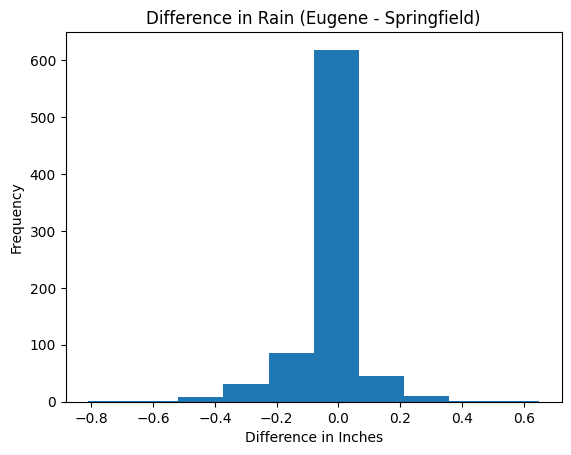

In [4]:
#Now we make a histogram of the differences for part B
difference = rain["eugene"] - rain["springfield"]
plt.hist(difference)
plt.title("Difference in Rain (Eugene - Springfield)")
plt.xlabel("Difference in Inches")
plt.ylabel("Frequency")

**Response to Part C** On what proportion of the days did it rain more in Eugene than Springfield?
How about more in Springfield than in Eugene?

To find this were going to count the positives for eugene-springfield (not including 0, because that would imply that it rained the same amount in eugene and springfield). Then were going to divide the count for positives by the number of days recorded to get the proportion of days that eugene had more rain than springfield. Then we're going to repeat the process. We can't do 1- proportion because there are days that had no difference, and by doing 1 - proportion we would give those days with no difference to springfield. 


In [5]:
difference_array = np.array(difference) #this is eugene - springfield
positive_count = sum(difference_array > 0)
eugene_proportion = positive_count/len(difference)

negative_count = sum(difference_array < 0)
springfield_proportion = negative_count/len(difference)
print(f"Eugene More Rain Proportion: {eugene_proportion: .2f}", f"Springfield More Rain Proportion: {springfield_proportion: .2f}") 


Eugene More Rain Proportion:  0.23 Springfield More Rain Proportion:  0.36


**Response to Part D** Compute the $t$ statistic for the Eugene minus Springfield difference,
    and get a $p$-value for the two-sided test
    (i.e., the probability that the $t$ distribution is larger
    in absolute value than the number you calculated).



To do this were going to plug in some numbers into the formula for the t-value, pasted here: $$  T = \frac{\bar X - \mu}{S/\sqrt{n}}  $$
Mu is the expected mean, in this case being 0 because we would expect the difference to be 0 representative of eugene and springfield having no difference in rain. Knowing this, lets plug in the standard deviation of the sample, the mean of the sample, and n into this equation to get a test statistic of -6.6. Using the t_distribution with degrees of freedom being n-1 (in this case 801), we can call the t.cdf function and multiply it by 2 (because it two tailed test), to find a p value of essentially 0 (6.4 * 10^-11). 

In [6]:
from scipy.stats import t

In [7]:
n = len(difference_array) 
std_difference = np.std(difference_array)
mean_difference = np.mean(difference_array)
t_value = mean_difference/(std_difference/math.sqrt(n))
t_value
df = n-1
p_val = 2 * t.cdf(t_value, df)  #in this case we dont do 1 - t.cdf because t.cdf finds the area to the left. As we had a negative test statistic the area to the left is what we need
p_val
print(f"Test statistic: {t_value}, P-Value: {p_val}")

Test statistic: -6.624103577106379, P-Value: 6.405629979534156e-11


**Response to Part E** What is your conclusion? Write a few sentences reporting the results,
including the statistical tests and real-world interpretations.
Be sure to include takeaways and context (e.g., what was the average rainfall?).

To interpret our P-value, the probability of us getting a sample at least as extreme as ours assuming that there was no difference in rain between Eugene and Springfield is essentially 0 (our p-value). This means that we can reasonably conclude that there is a difference in rainfall between Eugene and Springfield despite their geographic closeness. However by the nature of our two tailed test, by this specific test we cannot conclude which city receives more rain. However, if we were to run a seperate one tailed t-test we would find signficiant statistical evidence that Springfield gets more rain than Eugene. As far as genuine takeaways go, this information isn't exactly the most useful considering that the average rain in eugene was .124 inches and the average rain in springfield is .150 inches. While this is a twenty-one percent difference between eugene rain and springfield rain, the reality is that it's only .025 inches of rain in difference. Now granted as someone who doesn't have the greatest understanding in the significance in rainfall I may be under appreciating the results, but to summarize, we have statistical evidence that there is a difference in rain between eugene and springfield, however in the practice the result is a minor difference.

In [8]:
print(f'Mean Rain Eugene: {np.mean(rain["eugene"])}, Mean Rain Springfield {np.mean(rain["springfield"])}')
print(f'Percent Difference between Springfield and Eugene: {np.round((.15 - .124)/.124 * 100,2)}%') #percent that springfield is different than eugene

Mean Rain Eugene: 0.12412718204488779, Mean Rain Springfield 0.14987531172069826
Percent Difference between Springfield and Eugene: 20.97%


# 2. Imaginary data

Make up a situation in which we'd have measured at least 3 quantitative variables
in at least 500 observations.
You should have some positively correlated pairs of variables and some negatively correlated pairs.
It does not have to be realistic or serious.

*(a)* Describe it in words.

*(b)* Simulate some data that looks at least roughly like what you'd expect
    real data to look like.
    
*(c)* Make plots of the data: histograms of each variable,
    and scatter plots of each pair of variables.

*(d)* Compute the correlations between each of your simulated variables
    (with `np.corrcoef( )`)
    and explain why correlations are positive or negative.

*Note*: By "looks at least roughly like you'd expect",
I mean that variables should be in *real units* and not totally unreasonable values.
So, counts should be actually integers,
weights should not be negative numbers,
etcetera.
For instance, if one of your variable is "number of pieces of candy obtained by a trick-or-treater",
then these should be nonnegative integers,
and should not be in the millions.
(If it's in the thousands, that's probably not realistic, but close enough.)

**Part A Response**

This is my situation: The three variables that we measured were number of pieces of coal that santa put into a house's stocking stuffers (Integers 1-40), quality of presents (officially rated 1-100 by the Union of Santa Labor Laws), and hours that the elves spent to make each present (1-10, can be a float) 


**Part B Response** 
so were going to make a function to simulate all of these things. While we make this function we're going to take into account correlations that should exist (I.E quality of present should be inversely related with number of pieces of coal, while hours spent to make each present to the quality of present should be positively related). In all of these things were also going to have a "noise component" to make sure things aren't perfectly related in a linear sense. In this case were going to simulate by making hours spent making presents independent. As a check, coal should be integers, quality of presents should be integers, and hours spent making a present should be a float
 
**Code For Part B**

In [9]:
rng = np.random.default_rng()

def sim_coal(time):
    noise = rng.integers(1,5)
    initial_coal = 35 - 3*np.round(time)
    if rng.uniform() > .5:
        return initial_coal - noise
    else:
        return initial_coal + noise

def sim_quality(time):
    noise = rng.integers(1,10)
    initial_quality = 9 * np.round(time)    
    if rng.uniform() > .5:
        initial_quality += noise
    else:
        initial_quality -= noise

    if initial_quality < 0:
        return 0
    else:
        return initial_quality 
def simulate_santa(size = 1000):
    '''
    returns a dataframe of simulated values 
    '''
    coal_array = np.empty(0)
    quality_array = np.empty(0)
    elves_array = np.empty(0)

    for i in range(size):
        time = rng.uniform(1,10)
        elves_array = np.append(elves_array, time)
        
        quality_array = np.append(quality_array, sim_quality(time))
        
        coal_array = np.append(coal_array, sim_coal(time))

    santa_dataframe = pd.DataFrame({"Elves Time": elves_array, "Coal Pieces": coal_array, "Present Quality": quality_array})
    return santa_dataframe
simulate_santa()

,Elves Time,Coal Pieces,Present Quality
0,5.443280,19.0,48.0
1,1.146446,29.0,0.0
2,1.075339,33.0,14.0
3,8.764285,5.0,73.0
4,2.716954,22.0,21.0
...,...,...,...
995,7.924868,8.0,65.0
996,7.142020,17.0,69.0
997,1.483923,33.0,5.0
998,9.628022,1.0,97.0


**Code To Part C**

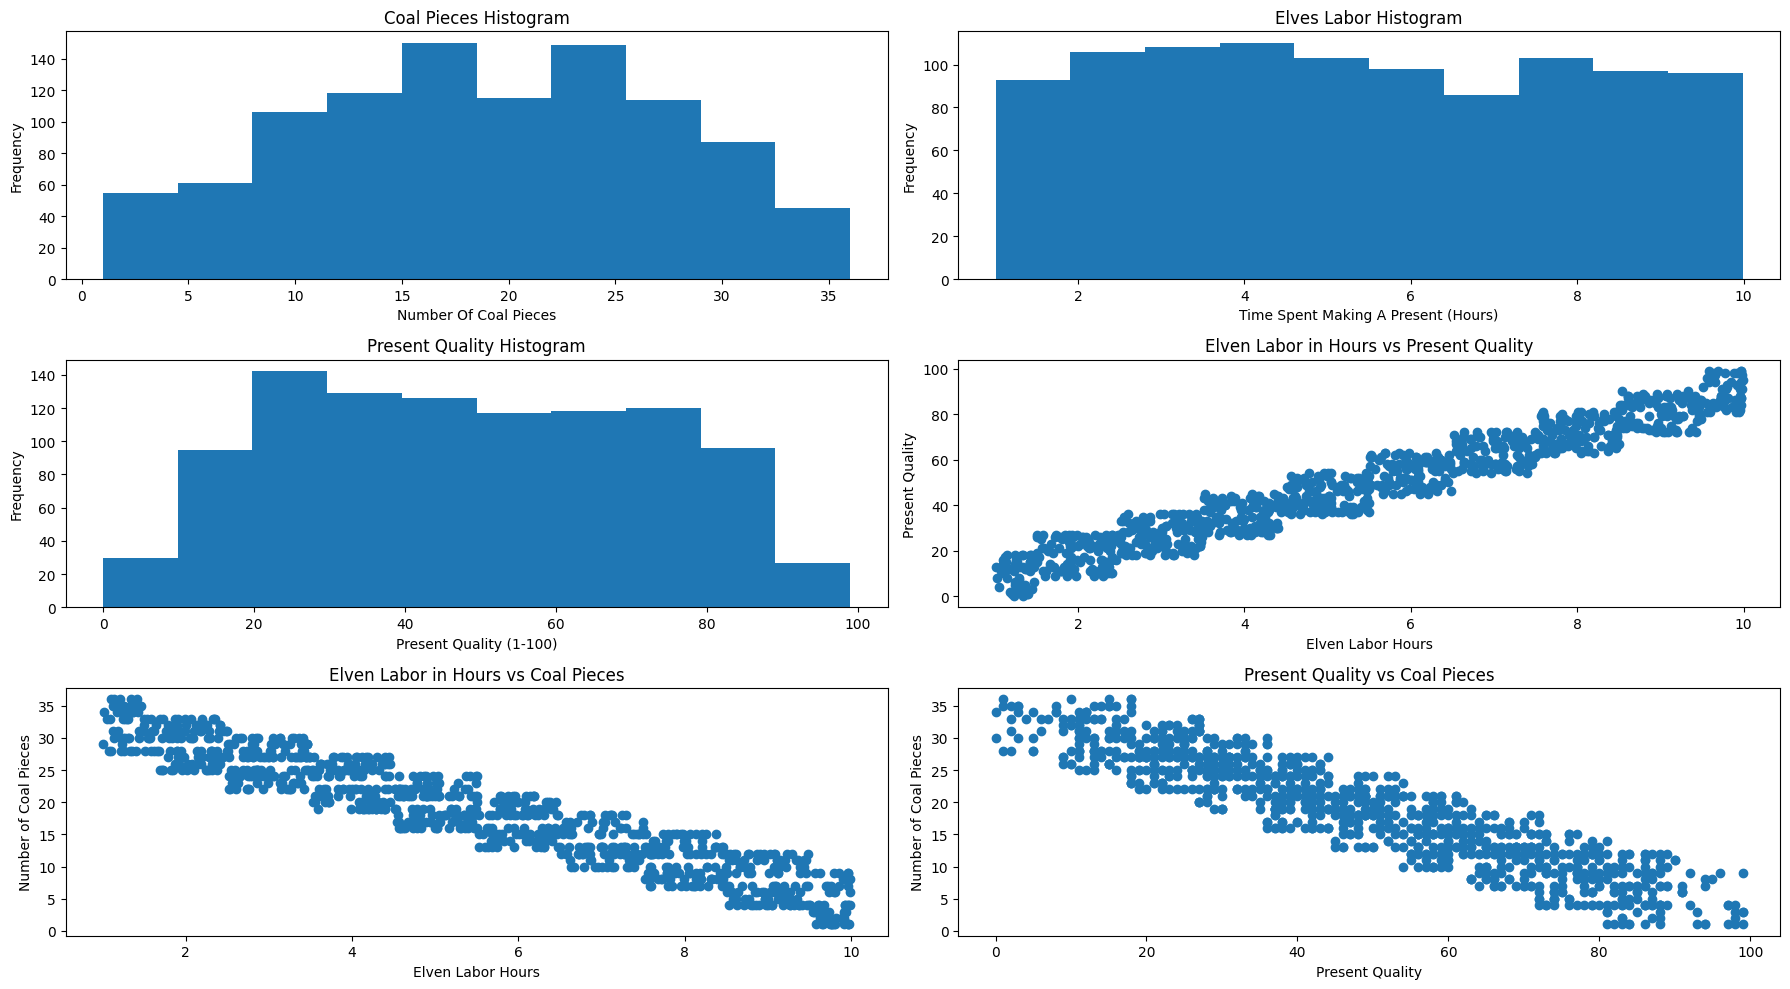

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(18, 10))  # 2 rows, 2 columns, figure size (width, height)
santa = simulate_santa(1000)

axs[0,0].hist(santa["Coal Pieces"])
axs[0,0].set_ylabel("Frequency")
axs[0,0].set_xlabel("Number Of Coal Pieces")
axs[0,0].set_title("Coal Pieces Histogram")

axs[0,1].hist(santa["Elves Time"])
axs[0,1].set_ylabel("Frequency")
axs[0,1].set_xlabel("Time Spent Making A Present (Hours)")
axs[0,1].set_title("Elves Labor Histogram")

axs[1,0].hist(santa["Present Quality"])
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlabel("Present Quality (1-100)")
axs[1,0].set_title("Present Quality Histogram")

axs[1,1].scatter(santa["Elves Time"],santa["Present Quality"]) 
axs[1,1].set_xlabel("Elven Labor Hours")
axs[1,1].set_ylabel("Present Quality")
axs[1,1].set_title("Elven Labor in Hours vs Present Quality")

axs[2,0].scatter(santa["Elves Time"],santa["Coal Pieces"]) 
axs[2,0].set_xlabel("Elven Labor Hours")
axs[2,0].set_ylabel("Number of Coal Pieces")
axs[2,0].set_title("Elven Labor in Hours vs Coal Pieces")

axs[2,1].scatter(santa["Present Quality"],santa["Coal Pieces"]) 
axs[2,1].set_xlabel("Present Quality")
axs[2,1].set_ylabel("Number of Coal Pieces")
axs[2,1].set_title("Present Quality vs Coal Pieces")
plt.tight_layout()

**Explanation for Part D**
So to compute some pearson values we can see them below in the code, but here's the explanations for them. Coal pieces and elven time is negative and strongly related because the elves simply dont want to have to work to make quality presents for these bad kids. Bad kids in santa's eyes just deserve coal, more coal, and then some more coal. As the bad kids is what is affecting the time spent making presents, and the bad kids deserve more coal, we find that coal pieces and elven labor is inversely related because elves spend much more time on making quality presents that would go to better behaved kids who get less coal(Seen in an r value of -.9365). 

This same logic is seen for the quality of presents to coal. By the exact same reasoning, quality presents take more time to make, time that bad kids have not earned. This is why there once again a negative correlation coefficient between present quality and coal pieces (-.915)

For our positive correlation we can see this among our elven labor hours and present quality. Obviously its clear that if the elves spent as long as they could on making one present, the present quality would increase. This is seen with our r-value of .967


**Code for Part D**

In [11]:
coal_labor_r = np.corrcoef(santa["Coal Pieces"], santa["Elves Time"])[0][1]
coal_quality_r = np.corrcoef(santa["Coal Pieces"], santa["Present Quality"])[0][1]
labor_quality = np.corrcoef(santa["Elves Time"], santa["Present Quality"])[0][1]
(coal_labor_r, coal_quality_r,labor_quality)

(-0.9444027492880329, -0.9185337367516565, 0.9667191762536043)

In [12]:
#test_santa = simulate_santa(1000)
#sns.pairplot(test_santa) This was making pair plots because I just found this function and thought it was cool

In [ ]:
fig, axes = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
    axs[i,j]